In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

- stinky gamer vs graduate
    - features: classes skipped exam score
- hot dog vs burgers
    - length, calories, juciness level,
- llama vs alpaca
    - neck length, ?

In [2]:
#stinky gamer vs graduate
#features classes skipped, exam score

np.random.seed(69420)
n_samples = 500

#Hours spent gaming
gamer_hours = np.random.normal(loc=40, scale=10, size=n_samples//2)  # Gamers game more
grad_hours = np.random.normal(loc=5, scale=3, size=n_samples//2)  # Graduates game less

#GPA
gamer_gpa = np.random.normal(loc=2.0, scale=0.5, size=n_samples//2)  # Gamers have lower GPAs
grad_gpa = np.random.normal(loc=3.5, scale=0.3, size=n_samples//2)  # Graduates have higher GPAs

In [3]:
#round
gamer_hours = np.round(gamer_hours,2)
grad_hours = np.round(grad_hours,2)
gamer_gpa = np.round(gamer_gpa,2)
grad_gpa = np.round(grad_gpa,2)

In [4]:
gaming_hours = np.concatenate([gamer_hours, grad_hours])
gpa = np.concatenate([gamer_gpa, grad_gpa])

In [5]:
labels = np.array([0] * (n_samples//2) + [1] * (n_samples//2))

In [6]:
data = pd.DataFrame({
    'Gaming_Hours': gaming_hours,
    'GPA': gpa,
    'Outcome': labels
})

In [7]:
data

,Gaming_Hours,GPA,Outcome
0,18.35,2.41,0
1,44.70,1.68,0
2,19.58,2.55,0
3,41.53,2.16,0
4,36.87,2.50,0
...,...,...,...
495,3.12,3.84,1
496,3.02,3.42,1
497,6.78,3.26,1
498,2.28,2.98,1


In [8]:
# Step 3: Split into training, test, and validation sets
X = data.drop('Outcome', axis=1)  # Features
y = data['Outcome']  # Labels

In [9]:
# Split into train (60%), test (20%), and validation (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [10]:
print("Training set size:", len(X_train))
print("Test set size:", len(X_test))
print("Validation set size:", len(X_val))

Training set size: 300
Test set size: 100
Validation set size: 100


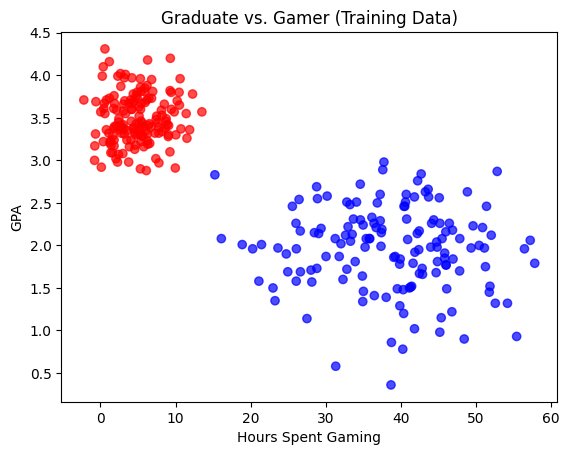

In [11]:
import matplotlib.pyplot as plt

# Visualize the dataset (training set)
plt.scatter(X_train['Gaming_Hours'], X_train['GPA'], c=y_train, cmap='bwr', alpha=0.7)
plt.xlabel('Hours Spent Gaming')
plt.ylabel('GPA')
plt.title('Graduate vs. Gamer (Training Data)')
plt.show()

In [46]:
#plot train,test,valid as colors?
#show logistic regression on training set
#then add valid set
#then add test set



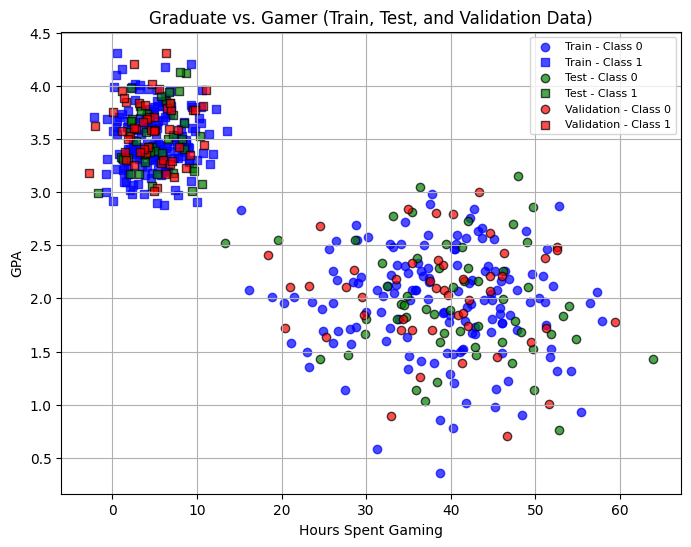

In [12]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Step 1: Split the dataset (from previous steps)
X = data[['Gaming_Hours', 'GPA']]
y = data['Outcome']

# Split into train (60%), test (20%), and validation (20%) sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Step 2: Define the markers and colors for the different classes
marker_map = {0: 'o', 1: 's'}  # 0 = gamer (circle 'o'), 1 = graduate (square 's')
color_map = {'train': 'b', 'test': 'g', 'val': 'r'}  # Blue = train, Green = test, Red = validation

# Step 3: Plot each set with different colors and markers
plt.figure(figsize=(8, 6))

# Plot train set
for label in [0, 1]:  # Loop through both classes (0 = gamer, 1 = graduate)
    mask = y_train == label
    plt.scatter(X_train['Gaming_Hours'][mask], X_train['GPA'][mask], 
                c=color_map['train'], marker=marker_map[label], label=f'Train - Class {label}', alpha=0.7)

# Plot test set
for label in [0, 1]:
    mask = y_test == label
    plt.scatter(X_test['Gaming_Hours'][mask], X_test['GPA'][mask], 
                c=color_map['test'], marker=marker_map[label], label=f'Test - Class {label}', edgecolor='k', alpha=0.7)

# Plot validation set
for label in [0, 1]:
    mask = y_val == label
    plt.scatter(X_val['Gaming_Hours'][mask], X_val['GPA'][mask], 
                c=color_map['val'], marker=marker_map[label], label=f'Validation - Class {label}', edgecolor='k', alpha=0.7)

# Step 4: Customize the plot
plt.xlabel('Hours Spent Gaming')
plt.ylabel('GPA')
plt.title('Graduate vs. Gamer (Train, Test, and Validation Data)')
plt.legend(loc='best', fontsize=8)
plt.grid(True)

# Show the plot
plt.show()


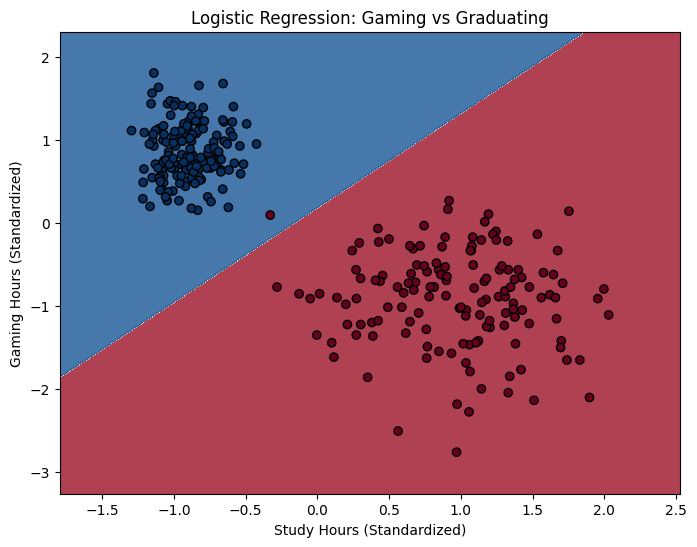

In [47]:
# Step 3: Standardize the features (optional but recommended)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 4: Train a logistic regression model
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

# Step 5: Visualize the decision boundary using Matplotlib
# Create a mesh grid to plot the decision boundary
x_min, x_max = X_train_scaled[:, 0].min() - 0.5, X_train_scaled[:, 0].max() + 0.5
y_min, y_max = X_train_scaled[:, 1].min() - 0.5, X_train_scaled[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict values for each point in the mesh grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 6: Plot the results
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, alpha=0.8, cmap=plt.cm.RdBu)

# Scatter plot of the training data
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, edgecolors='k', marker='o', cmap=plt.cm.RdBu)

# Labels and title
plt.xlabel('Study Hours (Standardized)')
plt.ylabel('Gaming Hours (Standardized)')
plt.title('Logistic Regression: Gaming vs Graduating')

# Show the plot
plt.show()